In [1]:
# Importação de pacotes
import pandas as pd
import re
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar o dataset
dataset_1 = pd.read_excel("D:\Software Engineering\TCC\DATASET_2019_OFFICIAL.xlsx" ,usecols = "A,B,C,D,E,F,G,H,J,U,BF,BG,BH")

In [3]:
# Formatar os datasets
dataset_1 = dataset_1.loc[dataset_1['Fee'].notnull()]    # Remover as linhas sem valor na coluna 'Fee'
dataset_1['Fee'] = dataset_1['Fee'].astype(int)  # Converter a coluna 'Fee' do tipo float para int

for i in range (0, len(dataset_1['ID']),1):       # Convertendo a coluna 'Value' do String para um valor númerico igual à coluna 'Fee'
    dataset_1.iloc[i,7]=dataset_1.iloc[i,7][1:]    # Remover o símbolo'€'
    if 'M' in dataset_1.iloc[i,7]:
        dataset_1.iloc[i,7] = dataset_1.iloc[i,7].replace('M','')   # Remover a letra 'M'
        if '.' in dataset_1.iloc[i,7]:
            dataset_1.iloc[i,7] = dataset_1.iloc[i,7].replace('.','')
            dataset_1.iloc[i,7] = dataset_1.iloc[i,7]+'00000'
        else:
            dataset_1.iloc[i,7] = dataset_1.iloc[i,7]+'000000'
    else:
        dataset_1.iloc[i,7] = dataset_1.iloc[i,7].replace('K','')
        dataset_1.iloc[i,7] = dataset_1.iloc[i,7]+'000'   

    dataset_1['Contract Valid Until'].fillna('2023', inplace=True)        # Tratar os campos sem valores (NaN/Na), usando a moda
    
    if (len(dataset_1.iloc[i,9]) > 4):                                  # Padronizar os campos (existem valores do tipo 'Jun 30, 2019')
        dataset_1.iloc[i,9] = dataset_1.iloc[i,9][-4:]
        
dataset_1['Value'] = dataset_1['Value'].astype(int)  # Converter a coluna 'Fee' do tipo String para int

dataset_1['Contract Valid Until'] = dataset_1['Contract Valid Until'].astype('category')   # Transformar valores categoricos em valores númericos
dataset_1['Contract Valid Until'] = dataset_1['Contract Valid Until'].cat.codes

dataset_1['Best Position'] = dataset_1['Best Position'].astype('category')   # Transformar valores categoricos em valores númericos
dataset_1['Best Position'] = dataset_1['Best Position'].cat.codes

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

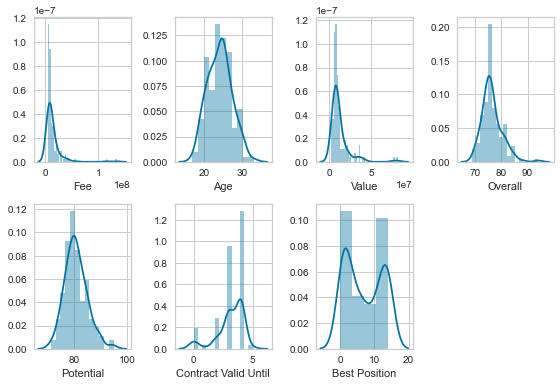

In [4]:
plt.figure(1)
plt.subplot(2,4,1)    
sns.distplot(dataset_1['Fee'])
plt.ylabel('')
plt.subplot(2,4,2)
sns.distplot(dataset_1['Age'])
plt.ylabel('')
plt.subplot(2,4,3)
sns.distplot(dataset_1['Value'])
plt.ylabel('')
plt.subplot(2,4,4)
sns.distplot(dataset_1['Overall'])
plt.ylabel('')
plt.subplot(2,4,5)
sns.distplot(dataset_1['Potential'])
plt.ylabel('')
plt.subplot(2,4,6)
sns.distplot(dataset_1['Contract Valid Until'])
plt.ylabel('')
plt.subplot(2,4,7)
sns.distplot(dataset_1['Best Position'])
plt.ylabel('')

plt.tight_layout(pad=1.0)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

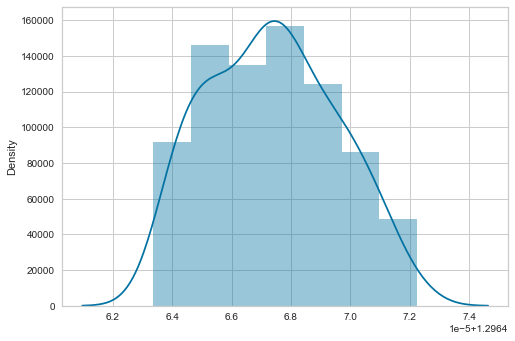

In [5]:
# Normalizar a variável 'Fee'
from scipy import stats
fee = stats.boxcox(dataset_1.iloc[:,8])[0]
sns.distplot(fee)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log_value', ylabel='Density'>

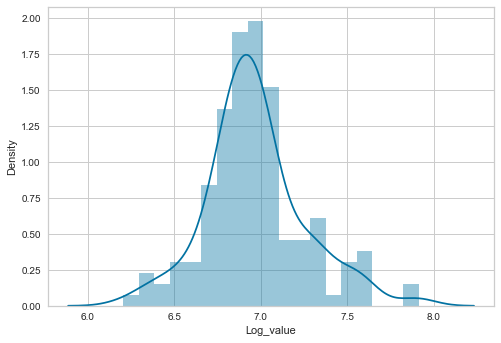

In [6]:
# Normalizar a variável 'Value'
dataset_1['Log_value'] = np.log10(dataset_1.iloc[:,7])
sns.distplot(dataset_1.iloc[:,13])

array([[ 1.       , -0.0675742],
       [-0.0675742,  1.       ]])

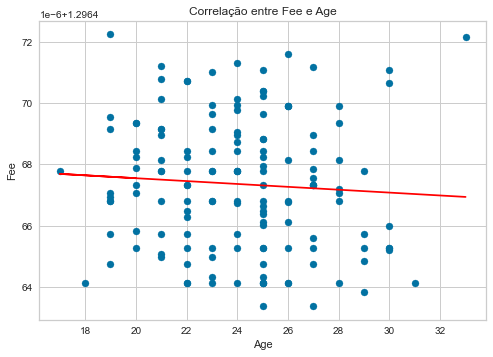

In [7]:
# Calcular a correlação entre as variáveis    
# 1) Correlação entre 'Fee' e 'Age'
Y = fee   # Definir a variável dependente (Y)
X1 = dataset_1.iloc[:,2].values   # Definir a variável independente (X)
correlacao_x1_y = np.corrcoef(X1,Y)
X1 = X1.reshape(-1,1)
modelo = LinearRegression() # Create model
modelo.fit(X1,Y)
modelo.intercept_
modelo.coef_
plt.scatter(X1,Y)
plt.plot(X1, modelo.predict(X1), color = 'red')
plt.title('Correlação entre Fee e Age')
plt.xlabel('Age')
plt.ylabel('Fee')
correlacao_x1_y

In [8]:
# Coeficiente de determinação entre Fee e Age
modelo.score(X1,Y)

0.004566272917402414

array([[1.       , 0.7393759],
       [0.7393759, 1.       ]])

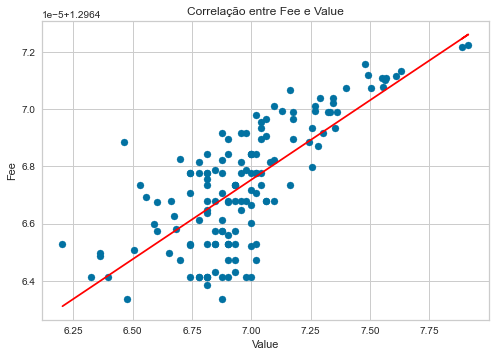

In [9]:
# 2) Correlação entre 'Fee' e 'Value'
X2 = dataset_1.iloc[:,13].values  
correlacao_x2_y = np.corrcoef(X2,Y)
X2 = X2.reshape(-1,1)
modelo = LinearRegression() # Create model
modelo.fit(X2,Y)
modelo.intercept_
modelo.coef_
plt.scatter(X2,Y)
plt.plot(X2, modelo.predict(X2), color = 'red')
plt.title('Correlação entre Fee e Value')
plt.xlabel('Value')
plt.ylabel('Fee')
correlacao_x2_y 

In [10]:
# Coeficiente de determinação entre Fee e Value
modelo.score(X2,Y)

0.5466767144262399

array([[1.        , 0.70207972],
       [0.70207972, 1.        ]])

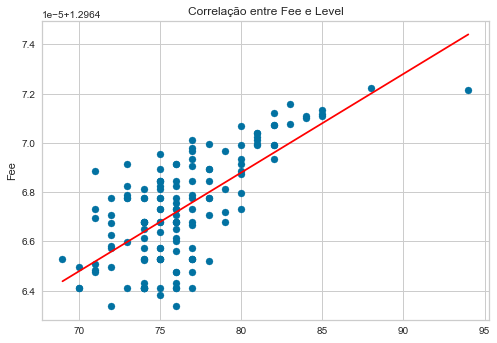

In [11]:
# 3) Correlação entre 'Fee' e 'Level'
X3 = dataset_1.iloc[:,4].values   # Definir a variável independente (X)
correlacao_x3_y = np.corrcoef(X3,Y)
X3 = X3.reshape(-1,1)
modelo = LinearRegression() # Create model
modelo.fit(X3,Y)
modelo.intercept_
modelo.coef_
plt.scatter(X3,Y)
plt.plot(X3, modelo.predict(X3), color = 'red')
plt.title('Correlação entre Fee e Level')   
plt.ylabel('Fee')
correlacao_x3_y 

In [12]:
# Coeficiente de determinação entre Fee e Level
modelo.score(X3,Y)

0.4929159376523764

array([[1.        , 0.64082236],
       [0.64082236, 1.        ]])

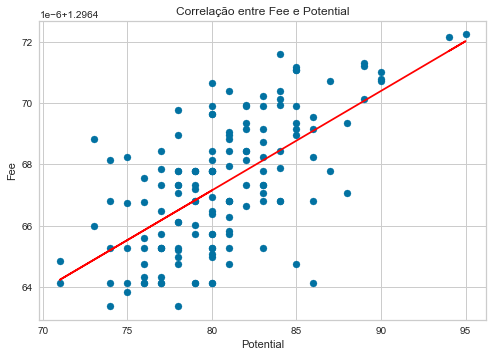

In [13]:
# 4) Correlação entre 'Fee' e 'Potential'
X4 = dataset_1.iloc[:,5].values   # Definir a variável independente (X)
correlacao_x4_y = np.corrcoef(X4,Y)
X4 = X4.reshape(-1,1)
modelo = LinearRegression() # Create model
modelo.fit(X4,Y)
modelo.intercept_
modelo.coef_
plt.scatter(X4,Y)
plt.plot(X4, modelo.predict(X4), color = 'red')
plt.title('Correlação entre Fee e Potential')
plt.xlabel('Potential')
plt.ylabel('Fee')
correlacao_x4_y 

In [14]:
# Coeficiente de determinação entre Fee e Potential
modelo.score(X4,Y)

0.4106533012864988

array([[1.        , 0.36966221],
       [0.36966221, 1.        ]])

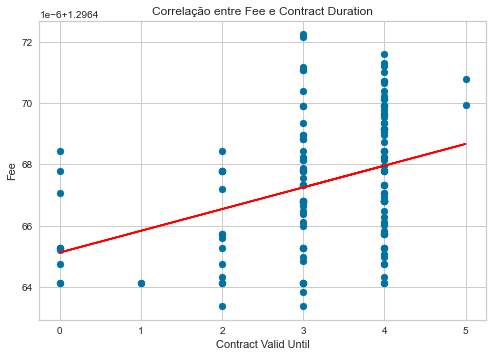

In [15]:
# 5) Correlação entre 'Fee' e 'Contract Valid Until'
X5 = dataset_1.iloc[:,9].values   # Definir a variável independente (X)
correlacao_x5_y = np.corrcoef(X5,Y)
X5 = X5.reshape(-1,1)
modelo = LinearRegression() # Create model
modelo.fit(X5,Y)
modelo.intercept_
modelo.coef_
plt.scatter(X5,Y)
plt.plot(X5, modelo.predict(X5), color = 'red')
plt.title('Correlação entre Fee e Contract Duration')
plt.xlabel('Contract Valid Until')
plt.ylabel('Fee')
correlacao_x5_y 

In [16]:
# Coeficiente de determinação entre Fee e Contract Duration
modelo.score(X5,Y)

0.13665014659108798

array([[1.        , 0.06305847],
       [0.06305847, 1.        ]])

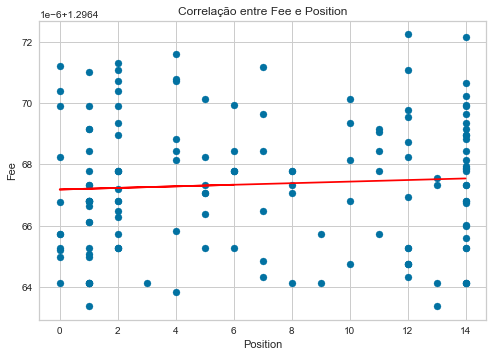

In [17]:
# 6) Correlação entre 'Fee' e 'Best Position'
dataset_1['Best Position'] = dataset_1['Best Position'].astype('category')   # Transformar valores categoricos em valores númericos
dataset_1['Best Position'] = dataset_1['Best Position'].cat.codes

X6 = dataset_1.iloc[:,10].values   # Definir a variável independente (X)
correlacao_x6_y = np.corrcoef(X6,Y)
X6 = X6.reshape(-1,1)
modelo = LinearRegression() # Create model
modelo.fit(X6,Y)
modelo.intercept_
modelo.coef_
plt.scatter(X6,Y)
plt.plot(X6, modelo.predict(X6), color = 'red')
plt.title('Correlação entre Fee e Position')
plt.xlabel('Position')
plt.ylabel('Fee')
correlacao_x6_y 

In [18]:
# Coeficiente de determinação entre Fee e Position
modelo.score(X6,Y)

0.003976371095793962

In [19]:
dataset_2 = dataset_1[['Name', 'Overall','Potential','Age','Value', 'Fee']]
dataset_2['prev_1'] = 0  # Coluna para Regressão multipla das variáveis Fee, Value, Overall e Potential. 
dataset_2['prev_2'] = 0  # Coluna para Regressão multipla das variáveis Fee, Value, Overall, Potential e Age.
dataset_2['prev_3'] = 0  # Coluna para Regressão multipla das variáveis Fee, Value, Overall, Potential, Age e Contract Valid Until.
dataset_2['prev_4'] = 0  # Coluna para Regressão multipla das variáveis Fee, Value, Overall, Potential,  Age, Contract Valid Until e Position.

<ipython-input-19-7deeb49d427c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['prev_1'] = 0  # Coluna para Regressão multipla das variáveis Fee, Value, Overall e Potential.
<ipython-input-19-7deeb49d427c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['prev_2'] = 0  # Coluna para Regressão multipla das variáveis Fee, Value, Overall, Potential e Age.
<ipython-input-19-7deeb49d427c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [ ]:
a = 0
while (a<len(dataset_1['ID'])):
    value = dataset_1.iloc[a,7]
    log_value = dataset_1.iloc[a,13]
    overall = dataset_1.iloc[a,4]
    potential = dataset_1.iloc[a,5]
    age = dataset_1.iloc[a,2]
    contract = dataset_1.iloc[a,9]
    position = dataset_1.iloc[a,10]
    ##################################
    # Regressão Linear Múltipla - 3 variáveis - com coluna Value  [prev_1]
    X = dataset_1[['Value', 'Overall','Potential']]
    Y = dataset_1['Fee']
    modelo = LinearRegression()
    modelo.fit(X,Y)
    modelo.coef_
    # Fazer previsões usando Regressão Linear Múltipla
    prev = np.array([value,overall,potential])
    prev = prev.reshape(1,-1)
    result = int(modelo.predict(prev))
    dataset_2.iloc[a,6] = result
    ##################################
    # Regressão Linear Múltipla - 4 variáveis - com coluna Log_value [prev_3]
    X = dataset_1[['Value', 'Overall','Potential','Age']]
    modelo = LinearRegression()
    modelo.fit(X,Y)
    modelo.coef_
    prev = np.array([value,overall,potential, age]) # prever o fee usando dois valores, value (x1) e overall (x2) e potential (x3)
    prev = prev.reshape(1,-1)
    result = int(modelo.predict(prev))
    dataset_2.iloc[a,7] = result
    ##################################
    # Regressão Linear Múltipla - 5 variáveis - com coluna Log_value [prev_4]
    X = dataset_1[['Value', 'Overall','Potential','Age', 'Contract Valid Until']]
    modelo = LinearRegression()
    modelo.fit(X,Y)
    modelo.coef_
    prev = np.array([value,overall,potential, age, contract]) # prever o fee usando dois valores, value (x1) e overall (x2) e potential (x3)
    prev = prev.reshape(1,-1)
    result = int(modelo.predict(prev))
    dataset_2.iloc[a,8] = result
    ##################################
    # Regressão Linear Múltipla - 6 variáveis - com coluna Log_value [prev_5]    
    X = dataset_1[['Value', 'Overall','Potential','Age', 'Contract Valid Until','Best Position']]
    modelo = LinearRegression()
    modelo.fit(X,Y)
    modelo.coef_
    prev = np.array([value,overall,potential, age, contract, position]) # prever o fee usando dois valores, value (x1) e overall (x2) e potential (x3)
    prev = prev.reshape(1,-1)
    result = int(modelo.predict(prev))
    dataset_2.iloc[a,9] = result
    a+=1

In [29]:
# THIS SECTION WILL BE USED FOR USER INPUT

valor = float(input("Insere o valor do jogador: "))
nivel = int(input("Insere o nível do jogador (dois digitos): "))
potencial = int(input("Insere o potencial do jogador (dois digitos): "))

X = dataset_1[['Value','Overall','Potential']]
Y = dataset_1['Fee']
modelo = LinearRegression()
modelo.fit(X,Y)
modelo.coef_

prev = np.array([valor,nivel,potencial]) # prever o fee usando dois valores, value (x1) e overall (x2) e potential (x3)
prev = prev.reshape(1,-1)
preco = modelo.predict(prev)
int(preco)

Insere o valor do jogador:  25000000
Insere o nível do jogador (dois digitos):  82
Insere o potencial do jogador (dois digitos):  89


26867020

In [ ]:
# Documentation
#-> Don't forget to mention the dataset_2.xlxs of transfers that are within the range of 10%
#-> use dataset 2021 with the following players to show it's effectivness(!! use transfermarkt.com to get actual value, use excel file to get level and potential):
  # Nathan Aké
  # 

In [ ]:
#dataset_2.to_excel('dataset_2.xlsx')